# Reflect daily stats

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd

import matplotlib.pylab as plt
import seaborn as sns

from reflect.stats import SOLVE_DURATION_DIFFICULTY_BINS, load_firebase_events, compute_per_device_stats, compute_stats, load_features, merge_stats_and_features

## Playing stats

In [2]:
events_df = load_firebase_events()
device_df = compute_per_device_stats(events_df)
stats_df = compute_stats(events_df, device_df)
stats_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19
...,...,...,...,...,...,...,...,...,...
207,2023-11-08,22,21,16,76.190476,23.809524,57.1720,easy,2023-11-08
208,2023-11-09,22,21,18,85.714286,14.285714,198.7190,medium,2023-11-09
209,2023-11-10,21,20,19,95.000000,5.000000,78.5385,easy,2023-11-10
210,2023-11-11,22,20,16,80.000000,20.000000,182.5340,medium,2023-11-11


How many people are playing Reflect?

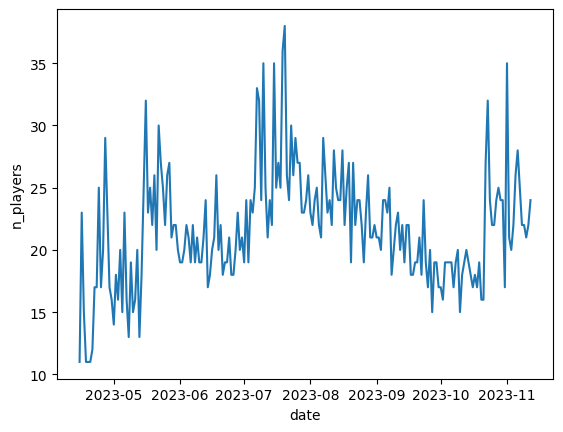

In [3]:
g = sns.lineplot(data=stats_df, x="date", y="n_players")

Total number of players ever (using devices as a proxy - of course the same person may have played on multiple devices)

In [4]:
len(events_df[events_df["name"] == "firstMove"]["device"].unique())

466

## Features

In [5]:
features_df = load_features()
all_df = merge_stats_and_features(stats_df, features_df)
all_df

,puzzle,n_players,n_started,n_solved,success_rate,failure_rate,median_solve_duration_s,difficulty_duration,date,filename,...,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,num_zero_reflection_blocks,excess_reflections,num_excess_reflection_beams,num_beam_edges,difficulty,setter_solve_duration_s
0,2023-04-15,11,10,6,60.000000,40.000000,2079.4835,superhard,2023-04-15,puzzle-2023-04-15.txt,...,4.666667,10,28,6,0,2,1,10,4,NaN
1,2023-04-16,23,18,14,77.777778,22.222222,141.8740,medium,2023-04-16,puzzle-2023-04-16.txt,...,4.833333,9,29,4,0,2,1,11,4,NaN
2,2023-04-17,15,13,7,53.846154,46.153846,1873.9040,superhard,2023-04-17,puzzle-2023-04-17.txt,...,6.000000,8,30,4,0,6,2,10,4,NaN
3,2023-04-18,11,11,11,100.000000,0.000000,211.7090,medium,2023-04-18,puzzle-2023-04-18.txt,...,4.000000,7,28,0,0,1,1,10,4,NaN
4,2023-04-19,11,10,9,90.000000,10.000000,73.5920,easy,2023-04-19,puzzle-2023-04-19.txt,...,4.666667,8,28,0,0,1,1,9,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,2023-11-08,22,21,16,76.190476,23.809524,57.1720,easy,2023-11-08,puzzle-2023-11-08.txt,...,4.166667,8,25,6,0,2,1,9,4,37.2
208,2023-11-09,22,21,18,85.714286,14.285714,198.7190,medium,2023-11-09,puzzle-2023-11-09.txt,...,4.800000,8,24,6,0,2,1,10,4,68.7
209,2023-11-10,21,20,19,95.000000,5.000000,78.5385,easy,2023-11-10,puzzle-2023-11-10.txt,...,4.142857,7,29,2,0,1,1,10,4,61.1
210,2023-11-11,22,20,16,80.000000,20.000000,182.5340,medium,2023-11-11,puzzle-2023-11-11.txt,...,4.500000,9,27,4,0,3,2,9,4,262.4


## Puzzle difficulty

First let's look at median solve durations (compare to the setter duration indicated by +).

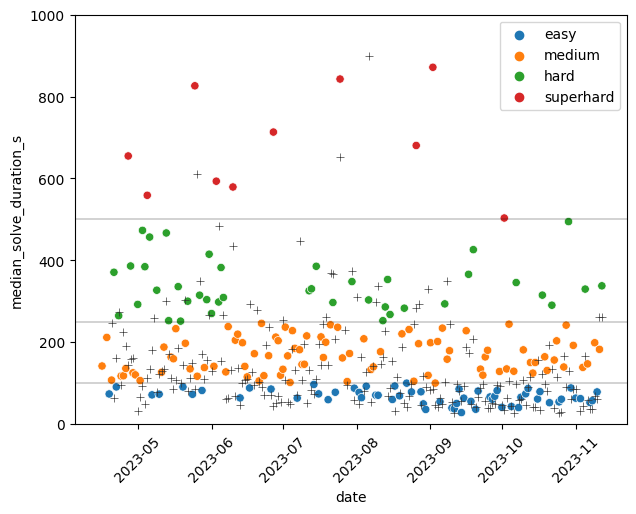

In [6]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');

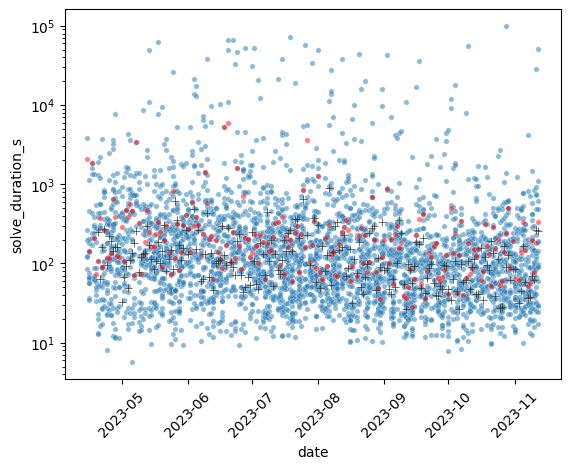

In [7]:
plt.xticks(rotation=45)
g = sns.scatterplot(data=device_df, x="date", y="solve_duration_s", s=15, alpha=0.5)
sns.scatterplot(data=all_df, x="date", y="median_solve_duration_s", s=15, alpha=0.5, color="red")
sns.scatterplot(data=all_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
g.set(yscale='log');

<Axes: xlabel='date', ylabel='failure_rate'>

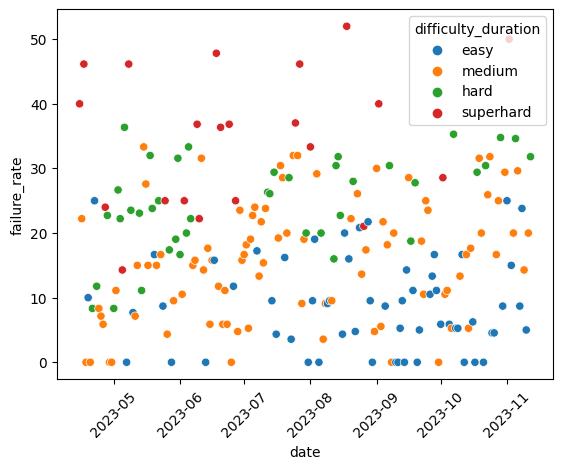

In [8]:
plt.xticks(rotation=45)
sns.scatterplot(data=stats_df, x="date", y="failure_rate", hue="difficulty_duration")

## Feature analysis

Let's see how features correlate with difficulty (as measured by `mean_solve_duration`)

In [9]:
all_df.columns

Index(['puzzle', 'n_players', 'n_started', 'n_solved', 'success_rate',
       'failure_rate', 'median_solve_duration_s', 'difficulty_duration',
       'date', 'filename', 'num_blocks', 'num_mirror_balls', 'num_beams',
       'num_reflections', 'mean_blocks_per_beam', 'max_blocks_per_beam',
       'num_multi_block_beams', 'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance',
       'num_zero_reflection_blocks', 'excess_reflections',
       'num_excess_reflection_beams', 'num_beam_edges', 'difficulty',
       'setter_solve_duration_s'],
      dtype='object')

In [10]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams', 'num_reflections',
       'mean_blocks_per_beam', 'max_blocks_per_beam', 'num_multi_block_beams',
       'mean_beams_per_block', 'max_beams_per_block',
       'num_double_reflect_blocks', 'mean_beam_distance', 'max_beam_distance',
       'total_beam_distance', 'excess_beam_distance', 'excess_reflections',
       'num_excess_reflection_beams']

In [11]:
all_df[["median_solve_duration_s", "failure_rate"] + feature_names].corr(numeric_only=True)\
    .sort_values("median_solve_duration_s", ascending=False)

,median_solve_duration_s,failure_rate,num_blocks,num_mirror_balls,num_beams,num_reflections,mean_blocks_per_beam,max_blocks_per_beam,num_multi_block_beams,mean_beams_per_block,max_beams_per_block,num_double_reflect_blocks,mean_beam_distance,max_beam_distance,total_beam_distance,excess_beam_distance,excess_reflections,num_excess_reflection_beams
median_solve_duration_s,1.000000,0.514451,0.072555,0.052632,0.122570,0.071545,-0.025107,0.112291,0.018295,0.089221,0.091029,0.084755,-0.031522,0.092216,0.198682,0.159807,0.186459,0.152236
failure_rate,0.514451,1.000000,0.132136,0.099679,0.116788,0.059721,0.028907,0.176029,0.040779,0.087106,0.115591,0.056726,-0.093840,0.151609,0.085755,0.255438,0.203659,0.152800
total_beam_distance,0.198682,0.085755,0.147176,0.096185,0.438945,0.310197,-0.221721,0.128058,0.061342,0.278924,-0.040644,0.402176,0.122343,0.330842,1.000000,0.283650,0.107686,0.024248
excess_reflections,0.186459,0.203659,0.326593,-0.403875,-0.283905,0.573774,0.480982,0.518378,-0.136650,-0.134668,-0.269108,0.351334,0.332639,0.178986,0.107686,0.135092,1.000000,0.782115
excess_beam_distance,0.159807,0.255438,-0.157077,-0.303154,-0.177427,0.265395,0.094518,0.253556,-0.138772,-0.033692,-0.278645,0.282650,0.351860,0.692967,0.283650,1.000000,0.135092,0.027084
num_excess_reflection_beams,0.152236,0.152800,0.276423,-0.194242,-0.169269,0.401744,0.434934,0.173773,0.052048,0.021653,-0.000808,0.253310,0.140514,-0.001488,0.024248,0.027084,0.782115,1.000000
num_beams,0.122570,0.116788,-0.017720,0.816043,1.000000,-0.224897,-0.587843,-0.164014,0.183827,0.787087,0.627644,0.176548,-0.811556,-0.196797,0.438945,-0.177427,-0.283905,-0.169269
max_blocks_per_beam,0.112291,0.176029,0.147380,-0.313880,-0.164014,0.459987,0.344173,1.000000,-0.249737,0.012194,-0.153979,0.341910,0.220049,0.305387,0.128058,0.253556,0.518378,0.173773
max_beam_distance,0.092216,0.151609,-0.096945,-0.268168,-0.196797,0.173979,-0.000309,0.305387,-0.252697,-0.173787,-0.344321,0.171972,0.398848,1.000000,0.330842,0.692967,0.178986,-0.001488
max_beams_per_block,0.091029,0.115591,-0.046383,0.594832,0.627644,-0.358566,-0.252317,-0.153979,0.287947,0.649505,1.000000,-0.283578,-0.713954,-0.344321,-0.040644,-0.278645,-0.269108,-0.000808


## Predictions over time

Train a model on data up to, but not including, date D, then use it to predict the solve duration on date D.

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [13]:
np.random.seed(42)

In [14]:
model_df = all_df[all_df["median_solve_duration_s"] < 1000] # remove outliers for model

In [15]:
feature_names = ['num_blocks', 'num_mirror_balls', 'num_beams',
        'num_reflections',
        'max_blocks_per_beam',
       'num_double_reflect_blocks', 'excess_reflections']

In [16]:
response_variable = "median_solve_duration_s"

In [17]:
predict_df = model_df.copy()
predict_df["predicted_solve_duration_s"] = np.nan

puzzles = model_df[model_df["puzzle"] >= "2023-05-01"]["puzzle"].tolist()

for puzzle in puzzles:
    train_df = model_df[model_df["puzzle"] < puzzle]
    X_train = train_df[feature_names]
    y_train = train_df[[response_variable]].values.ravel()

    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    predicted_solve_duration_s = model.predict(model_df[model_df["puzzle"] == puzzle][feature_names])[0]

    predict_df.loc[predict_df['puzzle']==puzzle, ['predicted_solve_duration_s']] = predicted_solve_duration_s

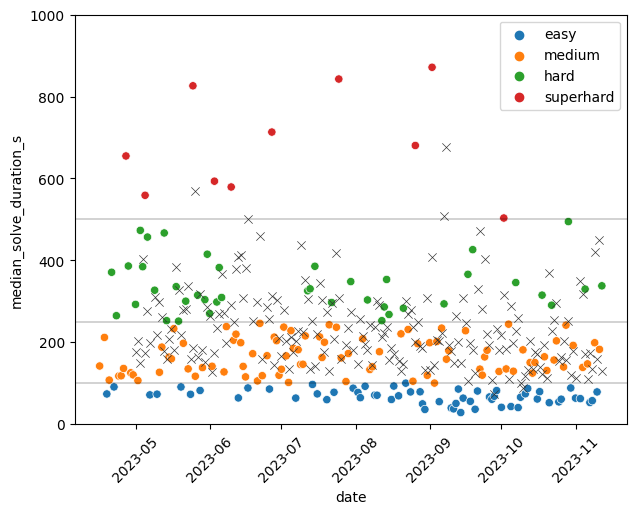

In [18]:
plt.ylim(0, 1000)
plt.xticks(rotation=45)
plt.tight_layout()

g = sns.scatterplot(data=predict_df, x="date", y="median_solve_duration_s", hue="difficulty_duration")
# sns.scatterplot(data=predict_df, x="date", y="setter_solve_duration_s", color=".2", marker="+")
sns.scatterplot(data=predict_df, x="date", y="predicted_solve_duration_s", color=".2", marker="x")

g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[1], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[2], linewidth=0.25, color='k')
g.axhline(SOLVE_DURATION_DIFFICULTY_BINS[3], linewidth=0.25, color='k');